In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [45]:
df = pd.read_csv('onlineqccheck.csv')
df.recording_date = df.recording_date.apply(lambda x: datetime.strptime(x,"%m/%d/%Y %H:%M"))


In [46]:
df.head()

,id,seal_gohm,input_resistance_mohm,electrode_0_pa,initial_access_resistance_mohm,blowout_mv,input_access_resistance_ratio,specimens,specimen,recording_date,created_at,workflow_state
0,580234388,2.207907,193.979104,-60.12499526,14.985007,0.535524,0.077251,Oxtr-T2A-Cre;Ai14-309026.02.02.01,Oxtr-T2A-Cre;Ai14-309026.02.02,2017-04-07 07:59:00,4/7/2017 15:30,manual_passed
1,580234523,1.110155,220.298032,30.72499893,13.508336,2.943530,0.061318,Oxtr-T2A-Cre;Ai14-309026.04.01.01,Oxtr-T2A-Cre;Ai14-309026.04.01,2017-04-07 07:53:00,4/7/2017 15:30,manual_passed
2,580236375,1.143608,360.544256,-41.40499749,12.322312,1.608995,0.034177,Oxtr-T2A-Cre;Ai14-309026.05.01.01,Oxtr-T2A-Cre;Ai14-309026.05.01,2017-04-07 08:08:00,4/7/2017 15:39,manual_passed
3,580257272,1.278105,110.533456,0.107500007,14.550114,2.300507,0.131635,Oxtr-T2A-Cre;Ai14-309026.02.01.01,Oxtr-T2A-Cre;Ai14-309026.02.01,2017-04-07 09:06:00,4/7/2017 16:34,manual_passed
4,580260595,1.400944,135.654672,35.50250371,18.054940,-0.847209,0.133095,Ndnf-IRES2-dgCre;Ai14-311159.04.01.01,Ndnf-IRES2-dgCre;Ai14-311159.04.01,2017-04-07 09:13:00,4/7/2017 16:49,manual_passed


In [47]:
df_b = df[df.recording_date < pd.Timestamp('2017-05-08 09:00:00')]
df_a = df[df.recording_date > pd.Timestamp('2017-05-08 09:00:00')]

In [48]:
results = [len(df_b[df_b.initial_access_resistance_mohm > 20]),
           len(df_a[df_a.initial_access_resistance_mohm > 20]),
           len(df_b[df_b.input_access_resistance_ratio > .15]),
           len(df_a[df_a.input_access_resistance_ratio > .15]),
           len(df_b[df_b.seal_gohm < 1]),
           len(df_a[df_a.seal_gohm < 1])]

In [49]:
results

[12, 11, 3, 5, 5, 12]

In [36]:
df_b[df_b['initial_access_resistance_mohm'] > 20]

,id,seal_gohm,input_resistance_mohm,electrode_0_pa,initial_access_resistance_mohm,blowout_mv,input_access_resistance_ratio,specimens,specimen,recording_date,created_at,workflow_state
0,580234388,2.207907,193.979104,-60.12499526,14.985007,0.535524,0.077250625,Oxtr-T2A-Cre;Ai14-309026.02.02.01,Oxtr-T2A-Cre;Ai14-309026.02.02,2017-04-07 07:59:00,4/7/2017 15:30,manual_passed
1,580234523,1.110155,220.298032,30.72499893,13.508336,2.943530,0.06131846,Oxtr-T2A-Cre;Ai14-309026.04.01.01,Oxtr-T2A-Cre;Ai14-309026.04.01,2017-04-07 07:53:00,4/7/2017 15:30,manual_passed
2,580236375,1.143608,360.544256,-41.40499749,12.322312,1.608995,0.034176975,Oxtr-T2A-Cre;Ai14-309026.05.01.01,Oxtr-T2A-Cre;Ai14-309026.05.01,2017-04-07 08:08:00,4/7/2017 15:39,manual_passed
3,580257272,1.278105,110.533456,0.107500007,14.550114,2.300507,0.131635385,Oxtr-T2A-Cre;Ai14-309026.02.01.01,Oxtr-T2A-Cre;Ai14-309026.02.01,2017-04-07 09:06:00,4/7/2017 16:34,manual_passed
4,580260595,1.400944,135.654672,35.50250371,18.05494,-0.847209,0.133094863,Ndnf-IRES2-dgCre;Ai14-311159.04.01.01,Ndnf-IRES2-dgCre;Ai14-311159.04.01,2017-04-07 09:13:00,4/7/2017 16:49,manual_passed
5,580506819,1.710368,122.554448,16.73249907,8.875119,-0.120565,0.072417763,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.04.02.01,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.04.02,2017-04-10 02:44:00,4/10/2017 10:19,manual_passed
6,580537206,0.991253,213.092816,8.177499476,19.93644,2.111714,0.093557542,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.03.01.01,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.03.01,2017-04-10 03:23:00,4/10/2017 11:14,auto_failed
7,580537614,1.633232,208.152768,-0.337499966,10.450968,1.933251,0.050208162,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.04.02.02,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.04.02,2017-04-10 03:37:00,4/10/2017 11:14,manual_passed
8,580569667,1.213828,151.47088,1.777499914,19.557886,0.421856,0.129119775,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.06.01.01,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.06.01,2017-04-10 04:31:00,4/10/2017 12:09,manual_passed
9,580584792,1.030106,108.633288,-34.13749838,13.941658,3.334093,0.128336887,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.06.02.01,Nkx2-1-CreERT2;Ai14 (IVSCC)-311671.06.02,2017-04-10 04:39:00,4/10/2017 12:34,manual_passed


In [44]:
type(df_b.initial_access_resistance_mohm[0])

str

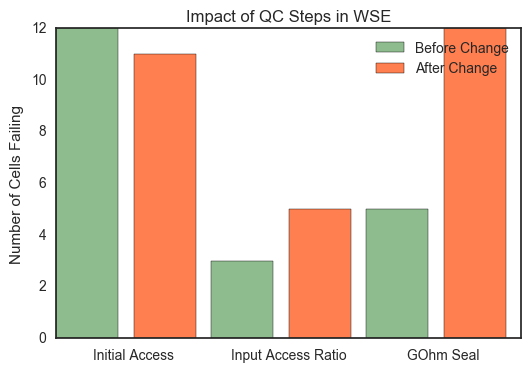

In [80]:
sns.set_style('white')
plt.bar([0,2,4],results[::2], color = 'darkseagreen', label = 'Before Change')
plt.bar([1,3,5],results[1::2], color = 'coral', label = 'After Change')
plt.xticks([1,3,5],['Initial Access','Input Access Ratio', 'GOhm Seal'])
plt.ylabel('Number of Cells Failing')
plt.title('Impact of QC Steps in WSE')
plt.legend()